In [153]:
import os
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [154]:
from extract_features_from_lyric import load_en_dataset, clean_lyric

dataset_path = os.path.join('..', '..', 'database', 'lyrics')
duplicate_path = os.path.join('..', 'database', 'removed_rows.json')

en_dataset = load_en_dataset(dataset_path, duplicate_path)


Song id = 1022
Detected lang = so
Song id = 1052
Detected lang = it
Song ML1056 is duplicated. 
For ..\..\database\lyrics\ML1068.json there is no language info in dataset
Song id = 1068
Detected lang = en
For ..\..\database\lyrics\ML1098.json there is no language info in dataset
Song id = 1098
Detected lang = en
Song id = 1154
Detected lang = en
For ..\..\database\lyrics\ML1159.json lyric is empty
For ..\..\database\lyrics\ML1159.json there is no language info in dataset
Song id = 1159
No features in text.
Detected lang = None
For ..\..\database\lyrics\ML1159.json is instrumental

For ..\..\database\lyrics\ML1230.json lyric is empty
For ..\..\database\lyrics\ML1230.json there is no language info in dataset
Song id = 1230
No features in text.
Detected lang = None
For ..\..\database\lyrics\ML1230.json is instrumental

For ..\..\database\lyrics\ML1291.json there is no language info in dataset
Song id = 1291
Detected lang = en
For ..\..\database\lyrics\ML1333.json there is no language info

In [155]:
en_dataset.head()

,mood,title,lyric,language,instrumental
1,happy,I Want Your Sex,I Want Your Sex Lyrics[From a PSA recorded for...,en,False
10,happy,Heart of Glass,Heart of Glass Lyrics[Verse 1]\nOnce I had a l...,en,False
100,happy,Crazy Little Thing Called Love,Crazy Little Thing Called Love Lyrics[Intro]\n...,en,False
1000,happy,Almost,Almost Lyrics[Verse 1]\nI almost got drunk at ...,en,False
1001,happy,Glow,Glow Lyrics[Verse 1]\nI never thought that you...,en,False


In [156]:
moods_distribution = en_dataset['mood'].value_counts()
moods_distribution

angry      491
happy      471
sad        462
relaxed    459
Name: mood, dtype: int64

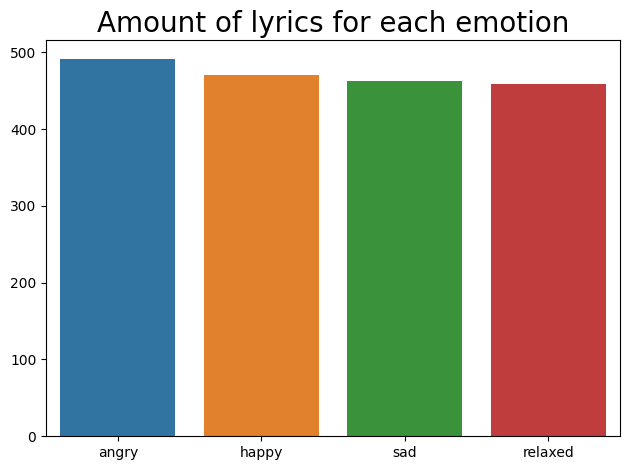

In [157]:
fig, ax = plt.subplots()
#fig.set_size_inches(10, 7)
ax = sns.barplot(x=list(moods_distribution.keys()), y=list(moods_distribution), ax=ax)
ax.set_title('Amount of lyrics for each emotion',fontsize=20)
plt.tight_layout()
plt.show()

In [158]:
num_words = en_dataset['lyric'].apply(lambda x: len(x.split(' ')))

print(round(num_words.mean(), 2))
print(num_words.median())
print(num_words.max())
print(num_words.min())
print(round(num_words.std(), 2))

225.24
194.0
1116
5
142.75


In [164]:
def get_pos_tags_count(lines, nlp, pos_tags_count):
    
    for line in lines:
        doc = nlp(line)
        for token in doc:
            if token.pos_ in pos_tags_count.keys():
                pos_tags_count[token.pos_] += 1

    return pos_tags_count

def count_pos_tags(dataset, nlp):
    
    pos_tags_count = {
        "happy":{
            'ADJ': 0,  # adjective
            'ADP': 0,  # adposition
            'ADV': 0,  # adverb
            'AUX': 0,  # auxiliary
            'CCONJ': 0,  # coordinating conjunction
            'DET': 0,  # determiner
            'INTJ': 0,  # interjection
            'NOUN': 0,  # noun
            'NUM': 0,  # numeral
            'PART': 0,  # particle
            'PRON': 0,  # pronoun
            'PROPN': 0,  # proper noun
            'PUNCT': 0,  # punctuation
            'SCONJ': 0,  # subordinating conjunction
            'SYM': 0,  # symbol
            'VERB': 0,  # verb
            'X': 0,  # other
        },
        "sad": {
            'ADJ': 0,  # adjective
            'ADP': 0,  # adposition
            'ADV': 0,  # adverb
            'AUX': 0,  # auxiliary
            'CCONJ': 0,  # coordinating conjunction
            'DET': 0,  # determiner
            'INTJ': 0,  # interjection
            'NOUN': 0,  # noun
            'NUM': 0,  # numeral
            'PART': 0,  # particle
            'PRON': 0,  # pronoun
            'PROPN': 0,  # proper noun
            'PUNCT': 0,  # punctuation
            'SCONJ': 0,  # subordinating conjunction
            'SYM': 0,  # symbol
            'VERB': 0,  # verb
            'X': 0,  # other
        },
        "angry": {
            'ADJ': 0,  # adjective
            'ADP': 0,  # adposition
            'ADV': 0,  # adverb
            'AUX': 0,  # auxiliary
            'CCONJ': 0,  # coordinating conjunction
            'DET': 0,  # determiner
            'INTJ': 0,  # interjection
            'NOUN': 0,  # noun
            'NUM': 0,  # numeral
            'PART': 0,  # particle
            'PRON': 0,  # pronoun
            'PROPN': 0,  # proper noun
            'PUNCT': 0,  # punctuation
            'SCONJ': 0,  # subordinating conjunction
            'SYM': 0,  # symbol
            'VERB': 0,  # verb
            'X': 0,  # other
        },
        "relaxed": {
            'ADJ': 0,  # adjective
            'ADP': 0,  # adposition
            'ADV': 0,  # adverb
            'AUX': 0,  # auxiliary
            'CCONJ': 0,  # coordinating conjunction
            'DET': 0,  # determiner
            'INTJ': 0,  # interjection
            'NOUN': 0,  # noun
            'NUM': 0,  # numeral
            'PART': 0,  # particle
            'PRON': 0,  # pronoun
            'PROPN': 0,  # proper noun
            'PUNCT': 0,  # punctuation
            'SCONJ': 0,  # subordinating conjunction
            'SYM': 0,  # symbol
            'VERB': 0,  # verb
            'X': 0,  # other
        }
    }

    for index, lyric in dataset['lyric'].iteritems():
        title = dataset['title'][index]

        lyric, lines = clean_lyric(lyric, title)
        
        pos_tags_count[dataset['mood'][index]] = get_pos_tags_count(lines, nlp, pos_tags_count[dataset['mood'][index]])
    
    # pos_tags_count = dict(sorted(pos_tags_count.items(), key=lambda item: item[1], reverse=True))
    
    return pos_tags_count

In [165]:
nlp = spacy.load('en_core_web_lg')
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

pos_tags_count = count_pos_tags(en_dataset, nlp)

for mood in pos_tags_count.keys():
    print(f"{mood}:")
    for key in pos_tags_count[mood].keys(): 
        print(f"{key}: {pos_tags_count[mood][key]}")

C:\Users\janto\AppData\Local\Temp\ipykernel_69060\1695672391.py:92: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, lyric in dataset['lyric'].iteritems():


happy:
ADJ: 7888
ADP: 11511
ADV: 8281
AUX: 9164
CCONJ: 4169
DET: 10711
INTJ: 4729
NOUN: 24084
NUM: 689
PART: 4854
PRON: 30025
PROPN: 7579
PUNCT: 2
SCONJ: 3273
SYM: 0
VERB: 28480
X: 484
sad:
ADJ: 5122
ADP: 8178
ADV: 6470
AUX: 6806
CCONJ: 3328
DET: 7127
INTJ: 1231
NOUN: 14846
NUM: 443
PART: 3237
PRON: 19074
PROPN: 2101
PUNCT: 1
SCONJ: 2468
SYM: 0
VERB: 17229
X: 110
angry:
ADJ: 7568
ADP: 12800
ADV: 7041
AUX: 9005
CCONJ: 3775
DET: 11573
INTJ: 2350
NOUN: 26287
NUM: 830
PART: 5014
PRON: 25717
PROPN: 5964
PUNCT: 11
SCONJ: 2711
SYM: 0
VERB: 26632
X: 161
relaxed:
ADJ: 4858
ADP: 7993
ADV: 6131
AUX: 6751
CCONJ: 2950
DET: 7095
INTJ: 2007
NOUN: 14585
NUM: 366
PART: 3211
PRON: 18005
PROPN: 3002
PUNCT: 3
SCONJ: 2431
SYM: 3
VERB: 16914
X: 145


In [ ]:
def get_n_top_words(dataset, n):
    all_lyrics = ''

    for index, lyric in dataset['lyric'].iteritems():
        title = dataset['title'][index]

        lyric, _ = clean_lyric(lyric, title)

        all_lyrics += lyric

    all_lyrics = all_lyrics.split(' ')
    fdist1 = nltk.FreqDist(all_lyrics)

    print (fdist1.most_common(n))

    return all_lyrics

In [ ]:
def plot_wordcloud(all_lyrics):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=3200, height=1600, background_color='white', min_font_size=14, stopwords = stopwords, max_words=100).generate(' '.join(all_lyrics))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
happy_dataset = en_dataset[en_dataset['mood'] == 'happy']
sad_dataset = en_dataset[en_dataset['mood'] == 'sad']
angry_dataset = en_dataset[en_dataset['mood'] == 'angry']
relaxed_dataset = en_dataset[en_dataset['mood'] == 'relaxed']

In [ ]:
happy_dataset.describe()

In [ ]:
happy_lyric = get_n_top_words(happy_dataset, 30)

In [ ]:
plot_wordcloud(happy_lyric)

In [ ]:
sad_dataset.describe()

In [ ]:
sad_lyric = get_n_top_words(sad_dataset, 30)

In [ ]:
plot_wordcloud(sad_lyric)

In [ ]:
angry_dataset.describe()

In [ ]:
angry_lyric = get_n_top_words(angry_dataset, 30)

In [ ]:
plot_wordcloud(angry_lyric)

In [ ]:
relaxed_dataset.describe()

In [ ]:
relaxed_lyric = get_n_top_words(relaxed_dataset, 30)

In [ ]:
plot_wordcloud(relaxed_lyric)